## Ï†ÑÌÜµÏ†Å ÏãúÍ≥ÑÏó¥ Î™®Îç∏ÎßÅ

### Ïú†ÌÜµÎß§Ïû• ÏàòÏöîÎüâ ÏòàÏ∏°


- Î∞úÏ£º ÏµúÏ†ÅÌôîÎ•º ÏúÑÌïú ÏàòÏöîÎüâ ÏòàÏ∏° : 1ÏùºÌõÑÏùò ÌåêÎß§ÎüâÏùÑ ÏòàÏ∏°

### 1. ÌôòÍ≤ΩÏ§ÄÎπÑ

In [1]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

Ìï®Ïàò ÏÉùÏÑ±

In [2]:
# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # Ï†ÑÏ≤¥ ÏãúÍ∞ÅÌôî
    plt.figure(figsize = (20,12))
    plt.subplot(2,1,1)
    plt.plot(y_train, label = 'train')
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.subplot(2,1,2)
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.show()

In [3]:
# ÏûîÏ∞®Î∂ÑÏÑù
def residual_diag(residuals, lags = 30) :
    print('* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) : ', round(spst.shapiro(residuals)[1],5))
    print('* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path)
data = data.loc[(data['date']>= '2013-06-01') & (data['date']< '2015-03-01')].reset_index(drop = True)
data.head(10)

date  item  sales  tot_sales  comp_sales
0  2013-06-01    28    124       1016          80
1  2013-06-02    28    139       1019          93
2  2013-06-03    28     77        676          65
3  2013-06-04    28     93        764          80
4  2013-06-05    28    117        818          80
5  2013-06-06    28    112        881          71
6  2013-06-07    28    127        929          81
7  2013-06-08    28    105        925          78
8  2013-06-09    28    129        998          95
9  2013-06-10    28    103        710          74

* Î≥ÄÏàò ÏÑ§Î™Ö

    * date : ÎÇ†Ïßú
    * item : ÏÉÅÌíàÏΩîÎìú (Ïó¨Í∏∞ÏÑúÎäî ÌïúÍ∞ÄÏßÄ ÏÉÅÌíàÎßå ÏûàÏùå)
    * sales : AÏú†ÌÜµÌöåÏÇ¨ a Îß§Ïû• ÌåêÎß§Îüâ ==> target
    * tot_sales : AÏú†ÌÜµÌöåÏÇ¨ Ï†ÑÏ≤¥ ÌåêÎß§Îüâ
    * comp_sales : Ïù∏Í∑ºÏóê ÏúÑÏπòÌïú BÏú†ÌÜµÌöåÏÇ¨ b Îß§Ïû• ÌåêÎß§Îüâ

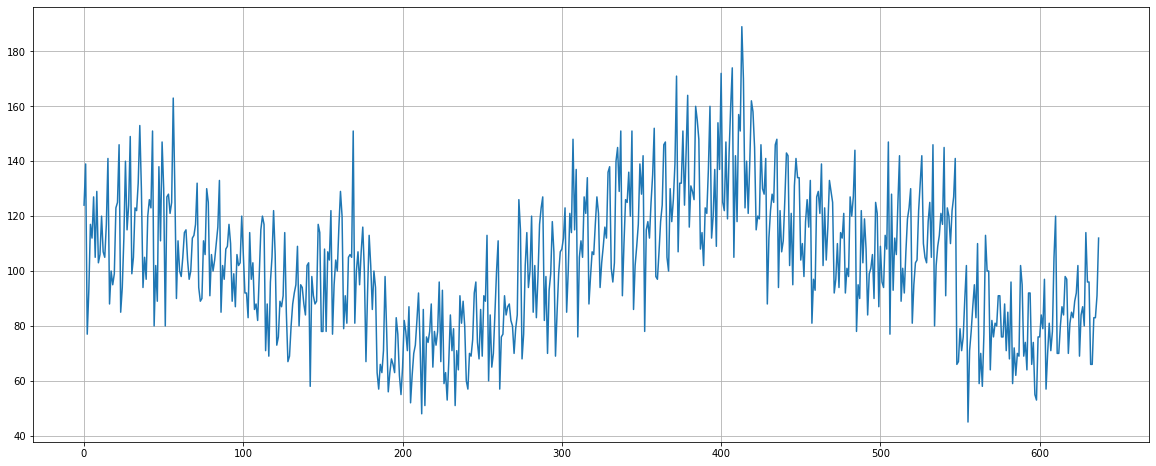

In [5]:
plt.figure(figsize = (20,8))
plt.plot(data['sales'])
plt.grid()
plt.show()

### 2. Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨

In [6]:
# yÎßåÎì§Í∏∞ (1Ïùº ÌõÑ ÏàòÏöîÎüâ ÏòàÏ∏°)
data['y'] = data['sales'].shift(-1)
display(data.head())
display(data.tail())

date  item  sales  tot_sales  comp_sales      y
0  2013-06-01    28    124       1016          80  139.0
1  2013-06-02    28    139       1019          93   77.0
2  2013-06-03    28     77        676          65   93.0
3  2013-06-04    28     93        764          80  117.0
4  2013-06-05    28    117        818          80  112.0

date  item  sales  tot_sales  comp_sales      y
633  2015-02-24    28     66        603          71   83.0
634  2015-02-25    28     83        622          61   83.0
635  2015-02-26    28     83        611          48   91.0
636  2015-02-27    28     91        696          74  112.0
637  2015-02-28    28    112        774          77    NaN

In [7]:
# Ï†úÏùº ÎßàÏßÄÎßâ ÌñâÏùÄ ÏÇ≠Ï†ú
data.dropna(axis = 0, inplace = True)
data.tail()

date  item  sales  tot_sales  comp_sales      y
632  2015-02-23    28     66        488          43   66.0
633  2015-02-24    28     66        603          71   83.0
634  2015-02-25    28     83        622          61   83.0
635  2015-02-26    28     83        611          48   91.0
636  2015-02-27    28     91        696          74  112.0

In [8]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
target = 'y'
x = data.drop([target, 'date'], axis = 1) #Ï†úÍ±∞Ìï† Îïå, dateÎèÑ Ï†úÍ±∞
y = data.loc[:, target]

train, val Î∂ÑÌï†

- ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê shuffleÌïòÏßÄ ÏïäÏùå.
- k-fold cross validation for Time Series : TimeSeriesSplit

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 30, shuffle = False)

### 3. Î™®Îç∏ÎßÅ1 : ARIMA

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00746
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.54662
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


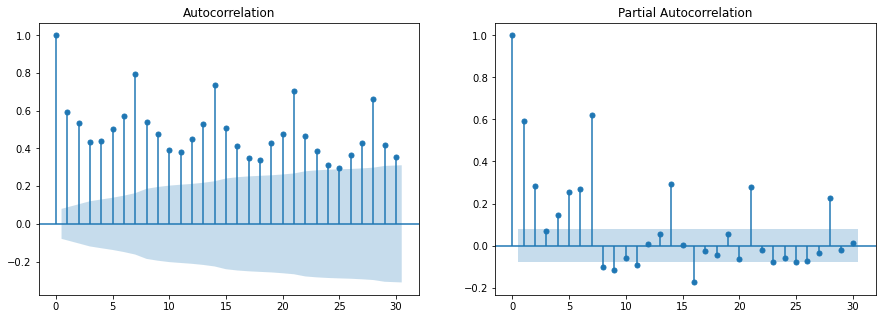

In [10]:
# yÍ∞í ÏÇ¥Ìé¥Î≥¥Í∏∞
residual_diag(y_train, lags=30)

Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

- p,d,qÍ∞í Ï†ïÌïòÍ∏∞.
- ARÏùò pÏ∞®ÏàòÏôÄ MAÏùò qÏ∞®Ïàò Î™®Îëê Í∞íÏù¥ ÌïÑÏöî.

In [11]:
# ÌïôÏäµ
model = sm.tsa.SARIMAX(y_train, order=(1,0,1)).fit()

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  1e-05
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


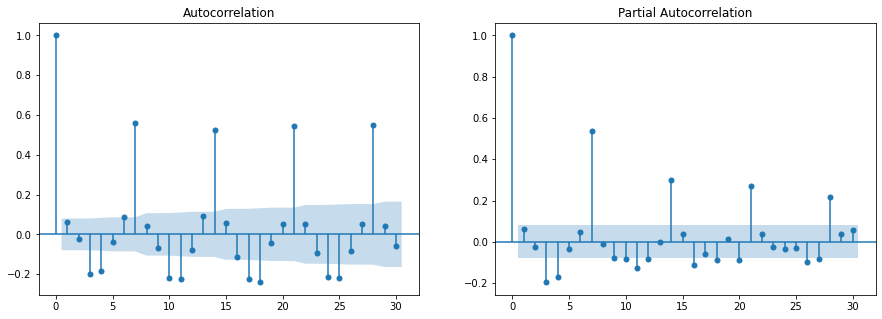

In [12]:
# ÌèâÍ∞Ä (ÏûîÏ∞®ÏßÑÎã®)
# trainÏóê ÎåÄÌïú pred Í∞í
residuals = model.resid # y_trainÍ≥º predÏùò Ï∞®Ïù¥ -> train Îç∞Ïù¥ÌÑ∞ Ïù¥ÌõÑÏóê ÎåÄÌïú pred Í∞í
residual_diag(residuals)

AIC

- ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄ.
- Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏.
- Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [13]:
# ÌèâÍ∞Ä (AIC)
print('model AIC :', model.aic)

model AIC : 5246.488864351655


In [14]:
# Validation
pred = model.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE :', mean_absolute_percentage_error(y_val, pred))

MAE : 15.265834521749838
MAPE : 0.1613604151880646


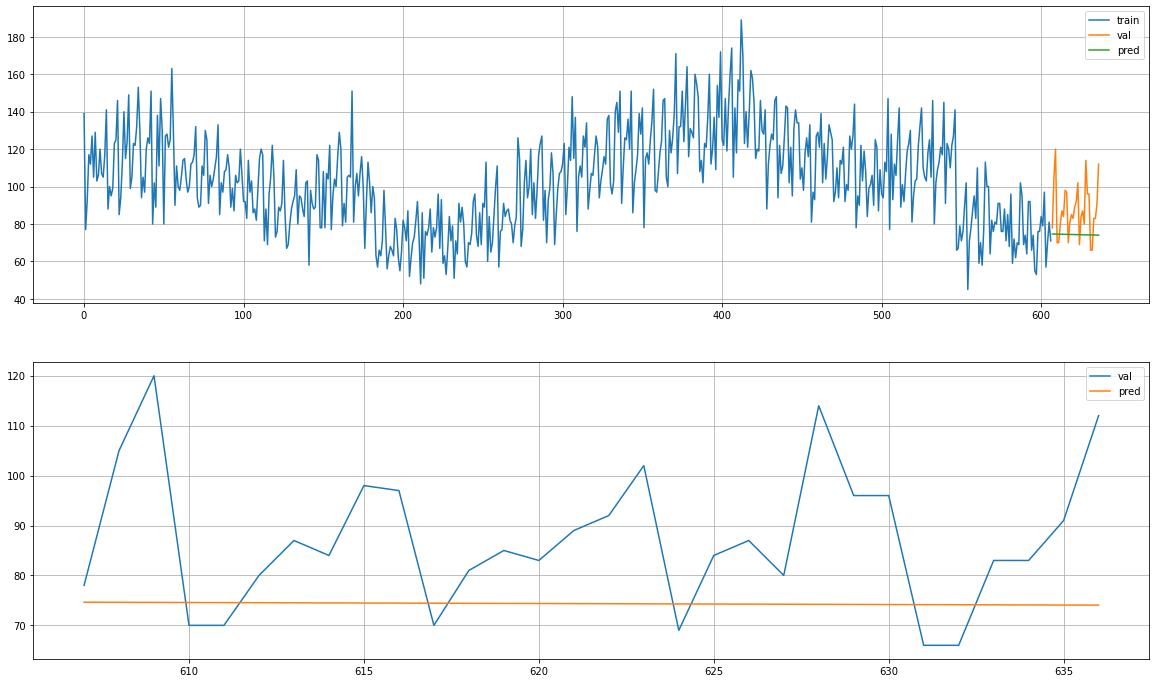

In [15]:
# ÏãúÍ∞ÅÌôî
plot_model_result(y_train, y_val, pred)

In [16]:
from itertools import product

In [17]:
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
p = [1,2,3,4]
q = [1,2,3,4]
d = [1]
iter = list(product(p,d,q))
iter

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

In [18]:
# ÌäúÎãù
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)


In [19]:
# ÌèâÍ∞Ä (ÏûîÏ∞®ÏßÑÎã®)
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic' : aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(p,d,q)       mae          aic
15     (4, 1, 4)  11.14623  4981.713678

params(p,d,q)       mae          aic
15     (4, 1, 4)  11.14623  4981.713678

In [20]:
model_t = sm.tsa.SARIMAX(y_train, order=(4,1,4)).fit()

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


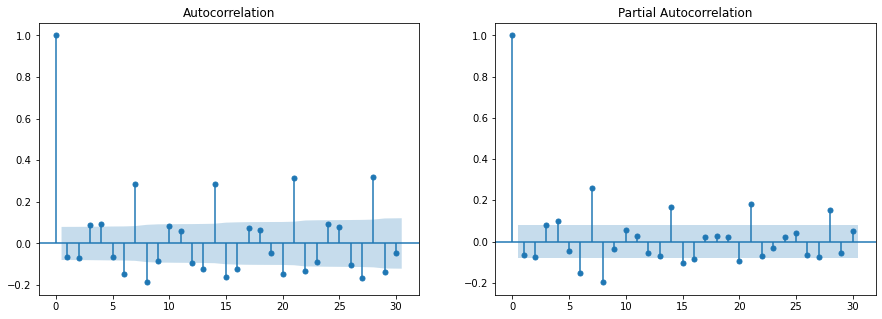

In [21]:
residuals = model_t.resid
residual_diag(residuals)

- 7Ïùº Ï£ºÍ∏∞ (Cycle)
    - Í≥ÑÏ†àÏÑ±Ïù¥ ÏûàÏùå.
    - ARIMAÎäî Ïù¥Î•º Ïûò Ìï¥Í≤∞Ìï† Ïàò ÏóÜÏùå -> SARIMA

In [22]:
# AIC
print('model_t AIC :', model_t.aic)

model_t AIC : 4981.7136779290995


In [23]:
# Validation
pred = model_t.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 11.146229935280152
MAPE: 0.12000050230602304


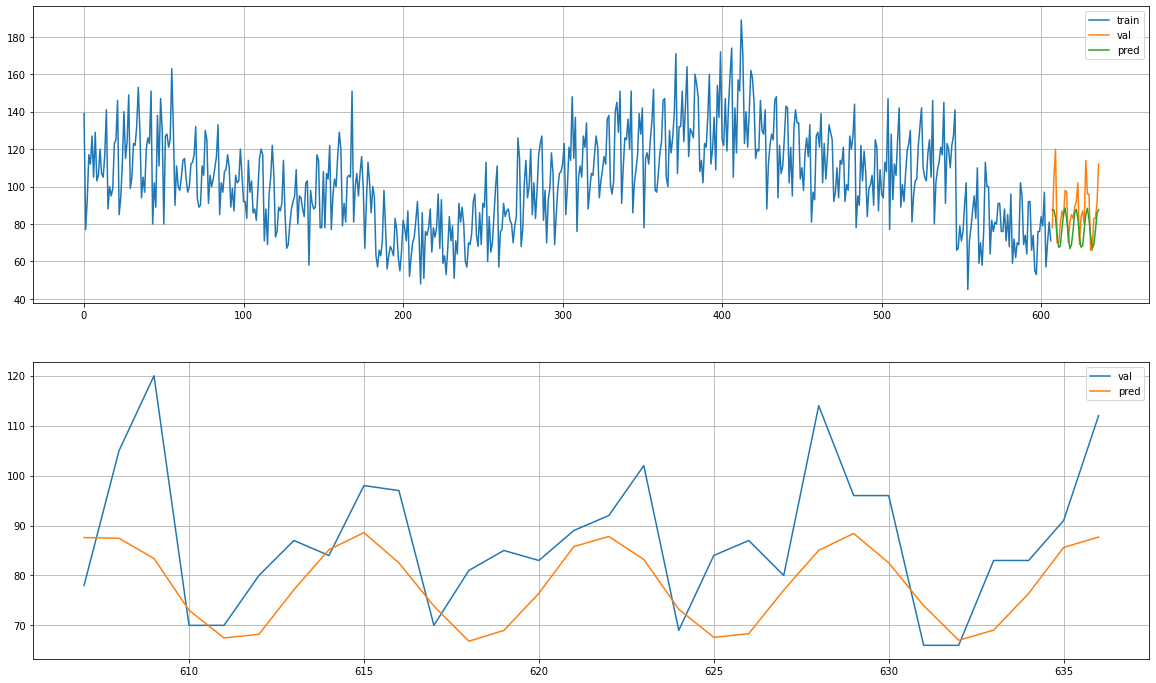

In [24]:
plot_model_result(y_train, y_val, pred)

### 4. Î™®Îç∏ÎßÅ2 : SARIMA

In [25]:
# ÌïôÏäµ (P, D, Q)
model_sarima = sm.tsa.SARIMAX(y_train, order=(4,1,4), seasonal_order=(1,1,1,7)).fit()

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


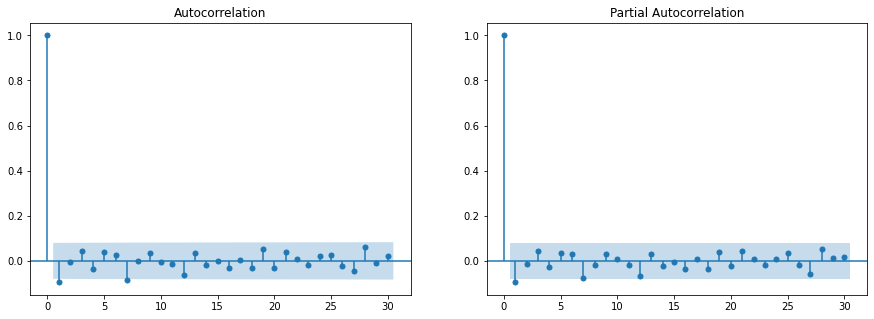

In [26]:
# ÌèâÍ∞Ä (ÏûîÏ∞®ÏßÑÎã®)
residuals = model_sarima.resid
residual_diag(residuals)

In [27]:
# AIC
print('model_sarima :', model_sarima.aic)

model_sarima : 4677.8480958378495


In [28]:
# Validation
pred = model_sarima.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE :', mean_absolute_percentage_error(y_val, pred))

MAE : 11.22324676572775
MAPE : 0.12623879677272665


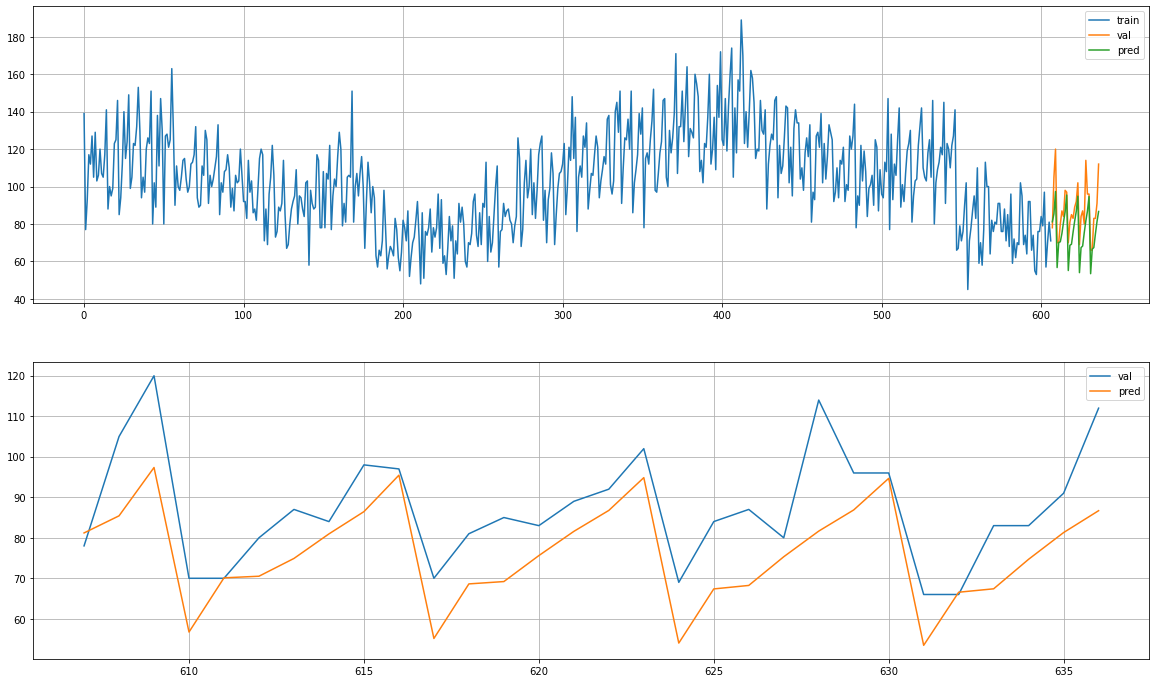

In [29]:
# ÏãúÍ∞ÅÌôî
plot_model_result(y_train, y_val, pred)

In [30]:
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
P = [1,2,3]
Q = [1,2,3]
D = [1]
mae, aic = [],[]
iter = list(product(P,D,Q))

for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(4,1,4), seasonal_order=(i[0],i[1],i[2],7)).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)


In [31]:
result = pd.DataFrame({'params(P,D,Q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(P,D,Q)        mae          aic
8     (3, 1, 3)  10.364058  4687.043886

params(P,D,Q)        mae          aic
0     (1, 1, 1)  11.223247  4677.848096

In [32]:
# Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ P, D, Q Í∞íÏúºÎ°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±.

model_sarima_t = sm.tsa.SARIMAX(y_train, order=(4,1,4), seasonal_order=(3,1,3,7)).fit()

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


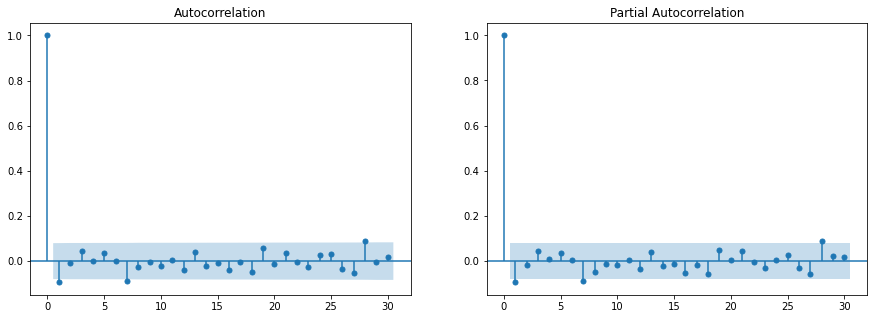

In [33]:
# ÌèâÍ∞Ä (ÏûîÏ∞®ÏßÑÎã®)
residuals = model_sarima_t.resid
residual_diag(residuals)

In [34]:
# AIC
print('model_sarima_t :', model_sarima_t.aic)

model_sarima_t : 4687.043885762135


In [35]:
# Validation
pred = model_sarima_t.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 10.364057590118147
MAPE: 0.11717397833265668


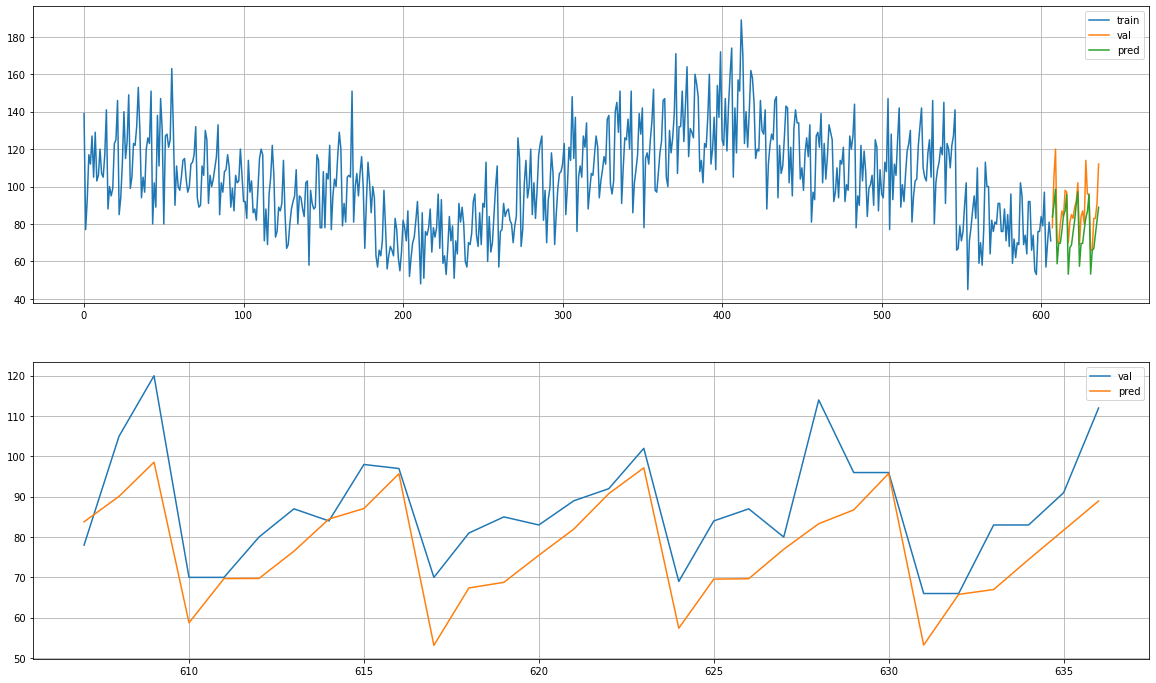

In [36]:
plot_model_result(y_train, y_val, pred)

### 5. Î™®Îç∏ÎßÅ3 : SARIMAX

In [37]:
m3_1 = sm.tsa.SARIMAX(y_train, order=(4,1,4), seasonal_order=(3,1,3,7), exog=x_train).fit()

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


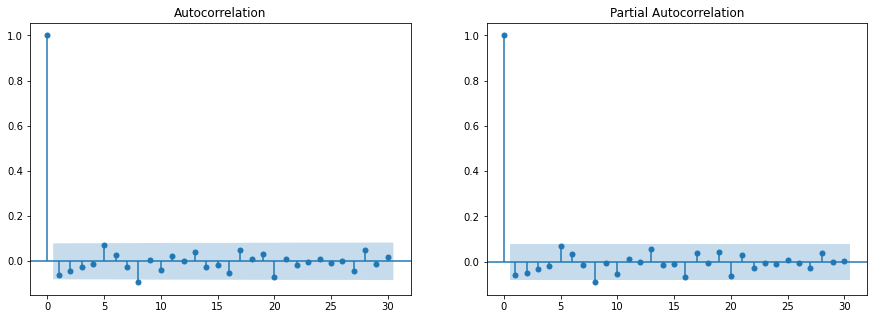

In [38]:
# ÌèâÍ∞Ä (ÏûîÏ∞®ÏßÑÎã®)
residuals = m3_1.resid 
residual_diag(residuals)

In [39]:
# AIC
print('m3_1 AIC :', m3_1.aic)

m3_1 AIC : 4648.015692124491


In [40]:
# Validation
pred = m3_1.forecast(30, exog=x_val)
print('MAE :', mean_absolute_error(y_val, pred)) 
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 7.4221171347416695
MAPE: 0.08401731762582142


In [41]:
# ÏãúÍ∞ÅÌôî
plot_model_result(y_train, y_val, pred)